# Getting Started in Machine Learning
### Chapter 11: Evaluating Binary Classifiers

This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## load mpg file 

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


2016 average fuel economy is 24.7 mpg
https://www.reuters.com/article/us-autos-emissions/u-s-vehicle-fuel-economy-rises-to-record-24-7-mpg-epa-idUSKBN1F02BX
downloaded 14 Dec 2018

## redo single variable logistic regression vs weight

In [3]:
mpg2016=24.7

In [4]:
weight=data["weight"]
mpg=data["mpg"]

X=np.array(weight).reshape(-1,1)
Y=np.array([1 if z<mpg2016 else 0 for z in mpg])

In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

In [6]:
XTRAIN,XTEST, YTRAIN, YTEST=train_test_split(X,Y)

In [7]:
r=LR().fit(XTRAIN,YTRAIN)
b=r.coef_[0,0]
a=r.intercept_[0]
x0=-a/b
print("a (intercept)=",a)
print("b (slope)=",b)
print("x0 (50% point)=",x0)

a (intercept)= -4.7554954330924835
b (slope)= 0.0018216151635915504
x0 (50% point)= 2610.592801454511


## make a prediction on the test set and evaluate confusion matrix

In [8]:
YP=r.predict(XTEST)
confusion_matrix(YTEST,YP)

array([[31, 10],
       [13, 44]])

## calculate probabilities

### plot ROC curve

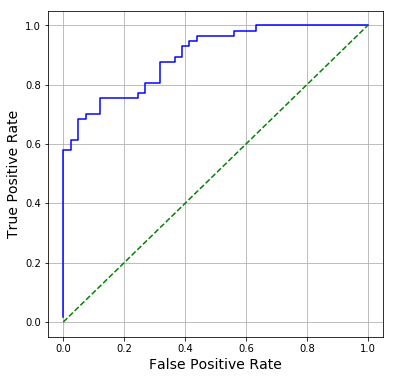

In [9]:
probs=r.predict_proba(XTEST)[:,1]
fpr, tpr, threshold = roc_curve(YTEST,probs)
plt.plot(fpr,tpr, c="blue")
plt.plot([0,1],[0,1],c="green",ls="--")

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(6,6)
#fig.savefig("ROC-curve-gas-guzzler-logistic.pdf")

# Implement ROC Curve from scratch

In [10]:
def ROC(Y,Prob):
    if (len(Y)!=len(Prob)):
        print("Length mismatch")
        return([])
    
    P=sum(Y); N=len(Y)-P

    if (P<1) or (N<1):
        print("There must be both postive and negative examples")
        return([])
    
    py_pairs = sorted(zip(Prob, Y), reverse=True)

    FP=0; TP=0
    ROC_CURVE=[]
    pprev=float("-inf")
    
    for p,y in py_pairs:
        if p != pprev:
            ROC_CURVE.append([FP/N, TP/P])
            pprev=p
        if y>0:
            TP+=1
        else:
            FP+=1
     
    ROC_CURVE.append([FP/N, TP/P])
    return(ROC_CURVE)

In [11]:
## demonstrate our own ROC curve

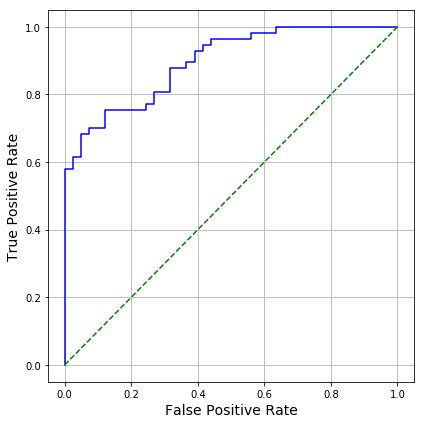

In [22]:
FPR,TPR=zip(*ROC(YTEST,probs))
plt.plot(FPR,TPR,c="blue")
plt.grid()
plt.plot([0,1],[0,1],c="green",ls="--")
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
#fig.savefig("ROC-CURVE-GAS-GUZZLER-LOGISTIC-REGRESSION-MODEL.pdf")


## demonstrate how to implement confusion matrix from scratch

In [13]:
def ConfMat(OBS,PRED):
    OPS=list(zip(OBS,PRED))
    TP = sum([(O==1) and (P==1) for O,P in OPS])
    TN = sum([(O==0) and (P==0) for O,P in OPS])
    FP = sum([(P==1) and (O==0) for O,P in OPS])
    FN = sum([(P==0) and (O==1) for O,P in OPS])   
    M = np.array([[TN,FP],[FN,TP]])
    return M
ConfMat(YTEST,YP)

array([[31, 10],
       [13, 44]])

In [14]:
confusion_matrix(YTEST,YP) # this is sklearn confusion matrix

array([[31, 10],
       [13, 44]])

# demonstrate how to calculate various metrics from scratch and compare to sklearn implementations

In [15]:
from sklearn.metrics import recall_score, precision_score, \
 f1_score,roc_auc_score, accuracy_score,precision_recall_fscore_support

def Metrics(OBS,PRED):
    OPS=list(zip(OBS,PRED))
    TP = sum([(O==1) and (P==1) for O,P in OPS])
    TN = sum([(O==0) and (P==0) for O,P in OPS])
    FP = sum([(P==1) and (O==0) for O,P in OPS])
    FN = sum([(P==0) and (O==1) for O,P in OPS])   
    P = sum(OBS)
    N = len(OBS)-P
    TPR = TP/P
    TNR = TN/N
    Specificity = TN/(FP+TN)
    Accuracy = (TP+TN)/(P+N)
    Precision = TP/(TP+FP)
    F=2/(1/Precision+1/TPR)
    return(TPR, TNR, Specificity, Accuracy, Precision,F)
TPR,TNR,Spec,Acc,Prec,F=Metrics(YTEST,YP)
print("TPR =         ",round(TPR,3),"sklearn recall_score=",
     round(recall_score(YTEST,YP),3))
print("TNR =         ",round(TNR,3))
print("Specificity = ",round(Spec,3))
print("Accuracy =    ",round(Acc,3),"sklearn accuracy_score=",
      round(accuracy_score(YTEST,YP),3))
print("Precision =   ",round(Prec,3),"sklearn precision_score=",
     round(precision_score(YTEST,YP),3))
print("F =           ",round(F,3),"sklearn f1_score=",
     round(f1_score(YTEST,YP),3))

TPR =          0.772 sklearn recall_score= 0.772
TNR =          0.756
Specificity =  0.756
Accuracy =     0.765 sklearn accuracy_score= 0.765
Precision =    0.815 sklearn precision_score= 0.815
F =            0.793 sklearn f1_score= 0.793


## calculate area under the ROC curve

#### and compare with SKLEARN version

In [16]:
roc_auc_score(YTEST,probs)

0.8960205391527598

In [17]:
FPR,TPR=zip(*ROC(YTEST,probs))

In [18]:
def TRAP(xvals, yvals):
    XLEFT = xvals[:-1]; XRIGHT= xvals[1:]
    YLEFT = yvals[:-1]; YRIGHT= yvals[1:]
    DX = XRIGHT-XLEFT
    print(sum(YLEFT*DX))
    return(sum(0.5*(YLEFT+YRIGHT)*DX))
TRAP(np.array(FPR), np.array(TPR))

0.8960205391527599


0.8960205391527599

In [19]:
from sklearn.metrics import auc

In [20]:
auc(FPR,TPR)

0.89602053915276

# demonstrate ROC operation

In [21]:
def ROCDEMO(Y,Prob):
    if (len(Y)!=len(Prob)):
        print("Length mismatch")
        return([])
    
    P=sum(Y)
    N=len(Y)-P

    if (P<1) or (N<1):
        print("There must be both postive and negative examples")
        return([])
    
    py_pairs = sorted(zip(Prob, Y), reverse=True)

    FP=0; TP=0
    ROC_CURVE=[]
    pprev=float("-inf")
    
    print("    p Y FP TP   FPR   TPR")  
    print("----- - -- -- ----- -----")
    for p,y in py_pairs:
        if p != pprev:
            ROC_CURVE.append([FP/N, TP/P])
            pprev=p
        if y>0:
            TP+=1
        else:
            FP+=1
        print("%3.3f %1d %2d %2d %3.3f %3.3f" %(p,y,FP,TP,FP/N,TP/P))

     
    ROC_CURVE.append([FP/N, TP/P])
    return(ROC_CURVE)

FPR,TPR=zip(*ROCDEMO(YTEST, probs))
#plt.plot(FPR,TPR)

    p Y FP TP   FPR   TPR
----- - -- -- ----- -----
0.990 1  0  1 0.000 0.018
0.986 1  0  2 0.000 0.035
0.977 1  0  3 0.000 0.053
0.961 1  0  4 0.000 0.070
0.960 1  0  5 0.000 0.088
0.954 1  0  6 0.000 0.105
0.947 1  0  7 0.000 0.123
0.942 1  0  8 0.000 0.140
0.936 1  0  9 0.000 0.158
0.925 1  0 10 0.000 0.175
0.912 1  0 11 0.000 0.193
0.912 1  0 12 0.000 0.211
0.910 1  0 13 0.000 0.228
0.902 1  0 14 0.000 0.246
0.901 1  0 15 0.000 0.263
0.895 1  0 16 0.000 0.281
0.872 1  0 17 0.000 0.298
0.869 1  0 18 0.000 0.316
0.865 1  0 19 0.000 0.333
0.865 1  0 20 0.000 0.351
0.861 1  0 21 0.000 0.368
0.840 1  0 22 0.000 0.386
0.826 1  0 23 0.000 0.404
0.821 1  0 24 0.000 0.421
0.816 1  0 25 0.000 0.439
0.815 1  0 26 0.000 0.456
0.812 1  0 27 0.000 0.474
0.803 1  0 28 0.000 0.491
0.802 1  0 29 0.000 0.509
0.787 1  0 30 0.000 0.526
0.779 1  0 31 0.000 0.544
0.771 1  0 32 0.000 0.561
0.767 1  0 33 0.000 0.579
0.762 0  1 33 0.024 0.579
0.749 1  1 34 0.024 0.596
0.734 1  1 35 0.024 0.614
0.731 0  2 3